# Learn how to clip netcdf data using shapefile in Python with ClimoMarineLab 
https://github.com/akashspunnayil/ClimoMarineLab

## Installing necessary packages for this notebook
### uncomment to run the cells, if needed 

In [1]:
# !pip install netCDF4
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install xarray
# !pip install cartopy
# !pip install geopandas
# !pip install shapely
# !pip install rioxarray

## Load packages 

In [2]:
import xarray as xr
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from shapely.geometry import box
from shapely.geometry import mapping 
import matplotlib.pyplot as plt
import rioxarray

## Load precipitation data¶

In [3]:
#  Load precipitation data
dataPath = './data/' # change if necessary
dataset = xr.open_dataset(dataPath + 'precip.mon.ltm.1991-2020-INDIA_025deg.nc')

print(dataset.info)
print(' ')


<bound method Dataset.info of <xarray.Dataset>
Dimensions:        (TIME: 12, bnds: 2, lon: 401, lat: 241)
Coordinates:
  * TIME           (TIME) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lon            (lon) float64 30.0 30.25 30.5 30.75 ... 129.5 129.8 130.0
  * lat            (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds      (TIME, bnds) object ...
    PRECIPITATION  (TIME, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Dec 26 11:08:48 2023: cdo remapbil,pr_high_res precip.m...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...>
 


/home/akashs/.local/lib/python3.8/site-packages/xarray/coding/times.py:716: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/akashs/.local/lib/python3.8/site-packages/xarray/coding/times.py:208: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
/home/akashs/.local/lib/python3.8/site-packages/xarray/coding/times.py:716: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/akashs/.local/lib/python3.8/site-packages/xarray/core/indexing.py:529: SerializationWarning: Unable to decode time axis into full numpy.da

## Load shapefile¶

In [4]:
# Load India shapefile
india_shapefile = "./data/India Shapefile With Kashmir/India Shape/india_st.shp"
india_gdf = gpd.read_file(india_shapefile)
print('india_gdf')
# print(india_gdf)
india_gdf


india_gdf


,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."
5,CHANDIGARH,"POLYGON ((76.85168 30.75696, 76.85275 30.70596..."
6,DADRA AND NAGAR HAVELI,"POLYGON ((72.99248 20.22041, 72.96240 20.28906..."
7,DAMAN AND DIU,"MULTIPOLYGON (((72.86860 20.32225, 72.92085 20..."
8,DELHI,"POLYGON ((76.92160 28.78554, 77.11057 28.83400..."
9,GOA,"POLYGON ((73.70534 15.71924, 73.83531 15.77222..."


## Read variables

In [6]:

lon = dataset['lon']
lat = dataset['lat']
time = dataset['TIME']
precip_data = dataset['PRECIPITATION']
print(precip_data.shape)
print(precip_data.dims)


(12, 241, 401)
('TIME', 'lat', 'lon')


## quick look on the shapefile

Text(0.5, 1.0, 'India States')

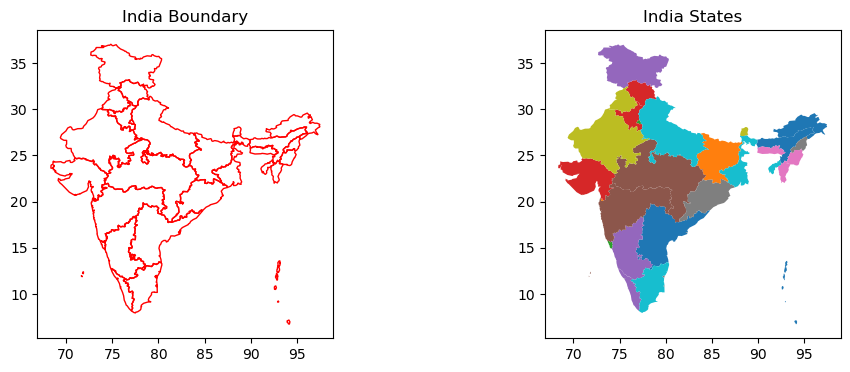

In [7]:

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot India boundary
india_gdf.boundary.plot(ax=axs[0], color='red', linewidth=1)
axs[0].set_title('India Boundary')

# Plot India states
india_gdf.plot(ax=axs[1], column='STATE', legend=False)
axs[1].set_title('India States')


## Clipping data using shapefile

(6.0, 38.0)

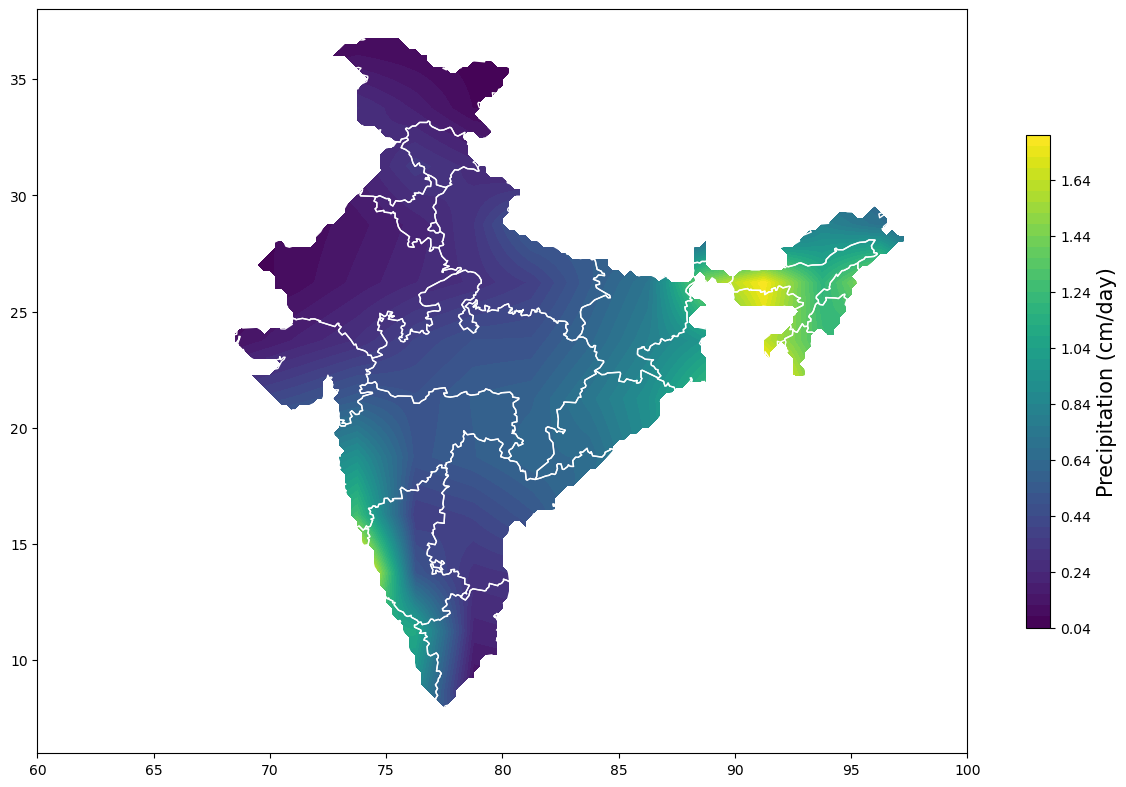

In [8]:
precip_data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
precip_data.rio.write_crs("epsg:24380", inplace=True)
# epsg:4326
# epsg:24380

# Load the shapefile of India using geopandas
india_shapefile = gpd.read_file('./data/India Shapefile With Kashmir/India Shape/india_st.shp',\
crs="epsg:24380")

clipped = precip_data.rio.clip(india_shapefile.geometry.apply(mapping), india_shapefile.crs, \
                               drop=False)

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 16))#, subplot_kw={'projection': ccrs.PlateCarree()})

contour=axs.contourf(clipped['lon'], clipped['lat'], clipped[5,:,:]/10, levels=50);
colorbar = plt.colorbar(contour, ax=axs, shrink=0.4)  # Adjust the shrink parameter as needed
colorbar.set_label('Precipitation (cm/day)', fontsize=15)  # Replace with your actual label

india_gdf.boundary.plot(ax=axs, color=None, edgecolor='white', linewidth=1)
axs.set_xlim([60, 100])  # Replace with your desired x-axis limits
axs.set_ylim([6, 38])    # Replace with your desired y-axis limits


## subplots

/tmp/ipykernel_12692/2677924004.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


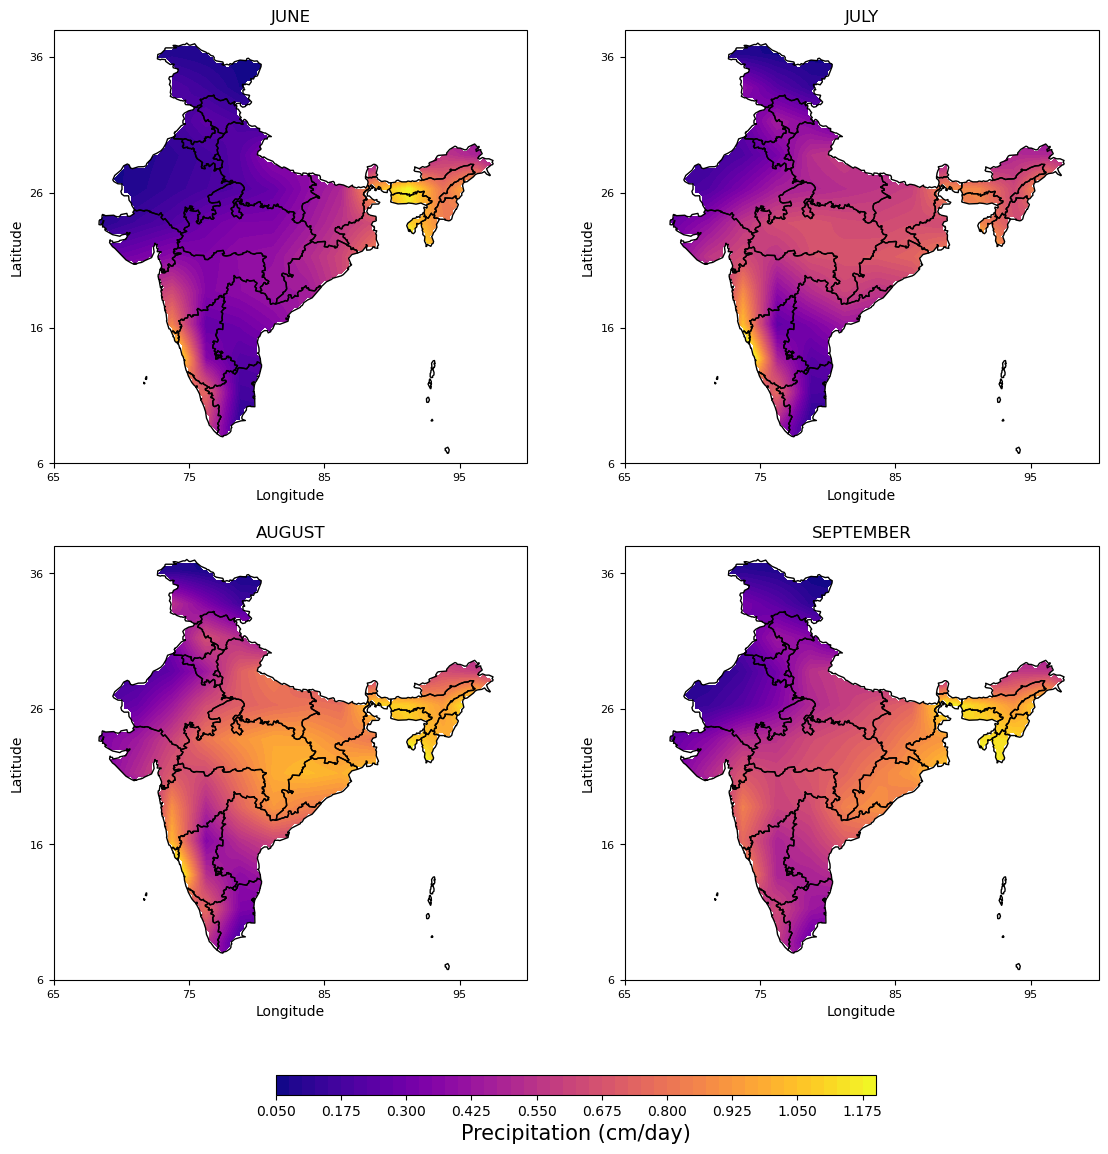

In [9]:
# Assuming clipped, india_gdf, and other required variables are defined earlier

# Subset data for June, July, August, and September
clipped_june_data      = clipped[5, :, :] 
clipped_july_data      = clipped[6, :, :]
clipped_august_data    = clipped[7, :, :]
clipped_september_data = clipped[8, :, :]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot contour for clipped data at time step 5
contour_5 = axs[0, 0].contourf(clipped['lon'], clipped['lat'], clipped_june_data/ 10, \
                               levels=50, cmap='plasma')
axs[0, 0].set_title('JUNE')
india_gdf.boundary.plot(ax=axs[0, 0], color=None, edgecolor='black', linewidth=1)

# Plot contour for clipped data at time step 6
contour_6 = axs[0, 1].contourf(clipped['lon'], clipped['lat'],  clipped_july_data/ 10, \
                               levels=50, cmap='plasma')
axs[0, 1].set_title('JULY')
india_gdf.boundary.plot(ax=axs[0, 1], color=None, edgecolor='black', linewidth=1)

# Plot contour for clipped data at time step 7
contour_7 = axs[1, 0].contourf(clipped['lon'], clipped['lat'],  clipped_august_data/ 10, \
                               levels=50, cmap='plasma')
axs[1, 0].set_title('AUGUST')
india_gdf.boundary.plot(ax=axs[1, 0], color=None, edgecolor='black', linewidth=1)

# Plot contour for clipped data at time step 8
contour_8 = axs[1, 1].contourf(clipped['lon'], clipped['lat'],  clipped_september_data/ 10,\
                               levels=50, cmap='plasma')
axs[1, 1].set_title('SEPTEMBER')
india_gdf.boundary.plot(ax=axs[1, 1], color=None, edgecolor='black', linewidth=1)

# Add colorbar with custom position
cbar = plt.colorbar(contour_8, ax=axs, orientation='horizontal', fraction=0.02, pad=0.1, \
                    aspect=30, location='bottom')
cbar.set_label('Precipitation (cm/day)', fontsize=15)  # Replace with your actual label
cbar.ax.set_position([0.2, -0.1, 0.6, 0.02])  # Adjust the position [left, bottom, width, height]


# Add common xlim and ylim, xlabel and ylabel, x-axis and y-axis ticks and labels
for ax in axs.flat:
    # Set labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    ax.set_xlim([65, 100])  # Replace with your desired x-axis limits
    ax.set_ylim([6, 38])    # Replace with your desired y-axis limits
    
    ax.set_xticks(np.arange(65, 100, 10))  # Adjust the x-axis ticks as needed
    ax.set_yticks(np.arange(6, 38, 10))   # Adjust the y-axis ticks as needed
    ax.set_xticklabels(ax.get_xticks(), fontsize=8)
    ax.set_yticklabels(ax.get_yticks(), fontsize=8)

plt.tight_layout()
plt.show()


# END OF CODE